# The impact of close venues to the overall price in King County, Seatle, USA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from bs4 import BeautifulSoup
import re

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import folium # plotting library
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
df = pd.read_csv('kc.csv')
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.rename({'lat': 'Latitude', 'long': 'Longitude'}, axis =1, inplace = True)

In [4]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [24]:
df0 = df.sample(1000)
df0

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,Latitude,Longitude,sqft_living15,sqft_lot15
11632,2492200055,20140708T000000,412000.0,3.0,1.75,1880,5752,1.0,0,0,...,7,940,940,1945,0,98126,47.5354,-122.378,1110,5201
21020,9826701201,20150209T000000,450000.0,2.0,1.50,1530,1012,2.0,0,0,...,8,1200,330,2005,0,98122,47.6020,-122.306,1530,1425
18109,3904921120,20140715T000000,711000.0,4.0,2.50,2770,9532,2.0,0,0,...,9,2770,0,1988,0,98029,47.5688,-122.012,2770,9219
17675,1568100730,20150218T000000,325000.0,2.0,2.00,1040,5796,1.0,0,2,...,6,1040,0,1921,0,98155,47.7362,-122.290,2300,5796
20016,7853420100,20140623T000000,633634.0,4.0,3.50,2960,6000,2.0,0,0,...,9,2960,0,2014,0,98065,47.5183,-121.886,2960,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,7841300505,20141027T000000,430000.0,4.0,3.75,2452,4800,2.0,0,0,...,7,2452,0,1936,1994,98055,47.4744,-122.213,1180,4800
12892,3361401210,20141231T000000,209000.0,2.0,1.00,1070,6120,1.0,0,0,...,6,1070,0,1962,0,98168,47.4989,-122.317,1130,6120
18080,5500100120,20140916T000000,380000.0,4.0,1.75,1790,10186,1.0,0,0,...,8,1790,0,1965,0,98177,47.7769,-122.376,1790,9142
19991,3057000300,20140930T000000,295000.0,3.0,1.50,1220,3286,2.0,0,0,...,7,1220,0,1982,0,98033,47.7168,-122.189,1220,2640


In [37]:
df3 = df0.head(150)
df3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,Latitude,Longitude,sqft_living15,sqft_lot15
11632,2492200055,20140708T000000,412000.0,3.0,1.75,1880,5752,1.0,0,0,...,7,940,940,1945,0,98126,47.5354,-122.378,1110,5201
21020,9826701201,20150209T000000,450000.0,2.0,1.50,1530,1012,2.0,0,0,...,8,1200,330,2005,0,98122,47.6020,-122.306,1530,1425
18109,3904921120,20140715T000000,711000.0,4.0,2.50,2770,9532,2.0,0,0,...,9,2770,0,1988,0,98029,47.5688,-122.012,2770,9219
17675,1568100730,20150218T000000,325000.0,2.0,2.00,1040,5796,1.0,0,2,...,6,1040,0,1921,0,98155,47.7362,-122.290,2300,5796
20016,7853420100,20140623T000000,633634.0,4.0,3.50,2960,6000,2.0,0,0,...,9,2960,0,2014,0,98065,47.5183,-121.886,2960,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11758,6163901913,20140722T000000,451000.0,5.0,3.00,2260,6508,1.0,0,0,...,7,1330,930,2003,0,98155,47.7508,-122.322,1940,9450
8343,8165501510,20141125T000000,320000.0,2.0,2.25,1550,1827,2.0,0,0,...,8,1550,0,2008,0,98106,47.5394,-122.368,1420,1826
14551,6821101765,20140621T000000,442900.0,4.0,1.75,1780,2788,1.0,0,0,...,6,890,890,1943,0,98199,47.6511,-122.400,1760,5664
8025,2225300149,20141222T000000,323000.0,4.0,1.75,1440,8114,1.0,0,0,...,7,1440,0,1963,0,98155,47.7639,-122.332,1940,7208


In [7]:
CLIENT_ID = 'MYOXTYBZ2X1CMNN2QJ0CW1T4WYSPLW4UMRT0RG0L1MA20DQO' # your Foursquare ID
CLIENT_SECRET = 'UPJD3YMO0LOBFVMNRAVHO20XEYIU1CBMXMMD4FR4YXWWFKMJ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
radius = 200


In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    n=0
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name, n+1)
        n=n+1
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['id', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [38]:
kc_venues = getNearbyVenues(names=df3['id'],
                                   latitudes=df3['Latitude'],
                                   longitudes=df3['Longitude'])

2492200055 1
9826701201 2
3904921120 3
1568100730 4
7853420100 5
2624079010 6
3383900058 7
1118001820 8
9268850350 9
2050100210 10
6163900411 11
192450300 12
847100021 13
5071400104 14
381000110 15
148000440 16
7891600260 17
3528000210 18
8658301060 19
5561000920 20
524069101 21
104501040 22
3236500220 23
8651600110 24
7841300285 25
9268850860 26
9522350090 27
4083306345 28
7852090810 29
7138200150 30
5635100080 31
9358002375 32
8827901350 33
3832050570 34
3303990380 35
1657000070 36
1247100035 37
7523700210 38
6817801030 39
4322200050 40
2724069070 41
4022906531 42
7923700020 43
1338800491 44
3574801110 45
1425059145 46
3294700310 47
1069000070 48
114101505 49
3918400028 50
3501600215 51
2464400435 52
7922710690 53
3303700376 54
7399301100 55
8155820080 56
200500410 57
1336800010 58
3754700050 59
8812401450 60
2517000650 61
1535204365 62
623049094 63
5729000070 64
5393600507 65
2310050110 66
3905080870 67
7618700112 68
3025059124 69
3359500960 70
666000143 71
2781280290 72
1722049154 

KeyError: 'groups'

In [12]:
kc_venues.rename(columns={'Neighborhood':'id'}, inplace = True)


In [26]:
kc_venues

,id,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,7129300520,47.5112,-122.257,Delightful Desserts,47.509913,-122.260640,Dessert Shop
1,7129300520,47.5112,-122.257,Upper Rainier Beach,47.507828,-122.256179,Gun Range
2,7129300520,47.5112,-122.257,Hutchinson Playground,47.513665,-122.260623,Baseball Field
3,7129300520,47.5112,-122.257,Body Balancing by Mark J. Kane,47.507650,-122.256378,Gym / Fitness Center
4,7129300520,47.5112,-122.257,D.P. Palmer General Contractor,47.514140,-122.253780,Office
5,6414100192,47.7210,-122.319,Java Jane,47.722454,-122.316508,Coffee Shop
6,6414100192,47.7210,-122.319,Seattle Drum School,47.719770,-122.312640,Rock Club
7,6414100192,47.7210,-122.319,Amante,47.718363,-122.318383,Pizza Place
8,6414100192,47.7210,-122.319,Licorice Fern Natural Area on Thornton Creek,47.722444,-122.316559,Park
9,6414100192,47.7210,-122.319,7-Eleven,47.719113,-122.313160,Convenience Store


In [17]:
kc_venues

,id,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,7129300520,47.5112,-122.257,Delightful Desserts,47.509913,-122.260640,Dessert Shop
1,7129300520,47.5112,-122.257,Upper Rainier Beach,47.507828,-122.256179,Gun Range
2,7129300520,47.5112,-122.257,Hutchinson Playground,47.513665,-122.260623,Baseball Field
3,7129300520,47.5112,-122.257,Body Balancing by Mark J. Kane,47.507650,-122.256378,Gym / Fitness Center
4,7129300520,47.5112,-122.257,D.P. Palmer General Contractor,47.514140,-122.253780,Office
5,6414100192,47.7210,-122.319,Java Jane,47.722454,-122.316508,Coffee Shop
6,6414100192,47.7210,-122.319,Seattle Drum School,47.719770,-122.312640,Rock Club
7,6414100192,47.7210,-122.319,Amante,47.718363,-122.318383,Pizza Place
8,6414100192,47.7210,-122.319,Licorice Fern Natural Area on Thornton Creek,47.722444,-122.316559,Park
9,6414100192,47.7210,-122.319,7-Eleven,47.719113,-122.313160,Convenience Store


In [15]:
m=0
list =[]
for n in df0['id']:
    m=0
    for c in kc_venues['id']:
        if n==c:
            m=m+1
    list.append(m)
df0['Venues Count'] = list

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [18]:
df0

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,Latitude,Longitude,sqft_living15,sqft_lot15,Venues Count
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,5
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,10
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,4
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,9
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,3


In [19]:
df1 = df0

In [20]:
address = 'Seattle, USA'
geolocator = Nominatim(user_agent="seattle_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, id0 in zip(df0['Latitude'],df0['Longitude'], df0['id']):
    label = '{}'.format(id0)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

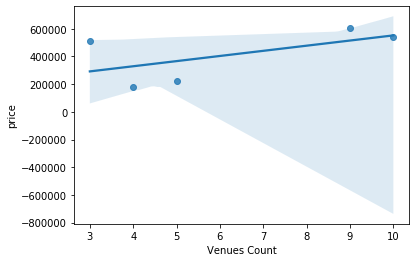

In [21]:
sns.regplot(x ='Venues Count', y ='price',data=df0)

In [22]:
df0.corr()['price'].sort_values()

id              -0.629396
sqft_living15   -0.511937
sqft_lot        -0.441315
sqft_lot15      -0.231902
Longitude       -0.184038
Latitude        -0.159220
zipcode          0.207972
yr_renovated     0.364471
floors           0.364471
condition        0.553553
sqft_above       0.565145
Venues Count     0.592921
grade            0.597931
yr_built         0.625158
sqft_basement    0.723434
bedrooms         0.768251
sqft_living      0.868591
bathrooms        0.961809
price            1.000000
waterfront            NaN
view                  NaN
Name: price, dtype: float64

In [23]:
X = df0[['Venues Count']]
Y = df0['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.3515550012113836